### Real world dataset ML experiment:
Real work is often complex and requires some efforts to process. This notebook illustrates how much work we may expect
For the practice purpose, we use **FuelConsumption.csv**: which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada from [Datasource]("http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64").

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

A good source for loading csv [here]("https://chrisalbon.com/python/pandas_dataframe_importing_csv.html"). Enthought Canopy introduces [**Import Tool**]("https://www.enthought.com/product/canopy/#/canopy-data-import-tool") to make life easier.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pylab as pl
import numpy as np


colnames =['Year','Make','Model','vClass','eSize','Cylinders','Transmission','FuelType','FuelCity','FuelHWay','FcombineKM',
           'FCombineMPG', 'CO2Emission','Co2Rating','SmogRating']
fields=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
df=pd.read_csv("C:/Dataset/MY2017FuelConsumptionRatings.csv",header=None,skiprows=2, names=colnames,usecols=fields,nrows=1056)
df.head()

,Year,Make,Model,vClass,eSize,Cylinders,Transmission,FuelType,FuelCity,FuelHWay,FcombineKM,FCombineMPG,CO2Emission,Co2Rating,SmogRating
0,2017,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.4,6.8,8.2,34,192,7,6
1,2017,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,12.6,9.0,11.0,26,259,4,6
2,2017,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6,AS9,Z,12.2,9.0,10.7,26,251,5,6
3,2017,ACURA,MDX HYBRID AWD,SUV - SMALL,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,6,6
4,2017,ACURA,NSX,TWO-SEATER,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,6


In [3]:
## Note: check missing values
df.isnull().sum()

Year            0
Make            0
Model           0
vClass          0
eSize           0
Cylinders       0
Transmission    0
FuelType        0
FuelCity        0
FuelHWay        0
FcombineKM      0
FCombineMPG     0
CO2Emission     0
Co2Rating       0
SmogRating      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F0314D898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000028F038AFA20>]], dtype=object)

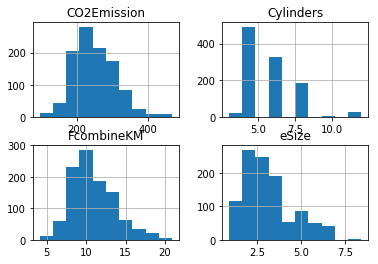

In [16]:
small_df=df[['eSize','Cylinders','FcombineKM','CO2Emission']]
small_df.hist()

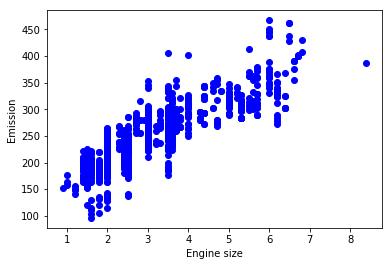

In [17]:
## Let say we want to see the relationship between engine size and co2 emission
plt.scatter(small_df.eSize, small_df.CO2Emission,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Linear relationship implies from this plot
As a result, we will build regression model.

In [18]:
# First, create train/test set
msk = np.random.rand(len(df)) < 0.8
train = small_df[msk]
test =  small_df[~msk]

##  Regression model 

In [7]:
train.shape

(817, 4)

In [8]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
train_x =np.asanyarray(train[['eSize']])
train_y =np.asanyarray(train[['CO2Emission']])
regr.fit (train_x, train_y)
# The coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ',regr.intercept_)

Coefficients:  [[ 35.83942174]]
Intercept:  [ 138.81625855]


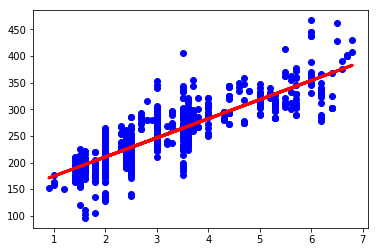

In [9]:
train_y_=regr.predict(train_x)
plt.scatter(train.eSize, train.CO2Emission,  color='blue')
plt.plot(train_x, train_y_ , color='red',linewidth=3)

### Evaluate the model with the Test data

Residual sum of squares: 917.58
Variance score: 0.74


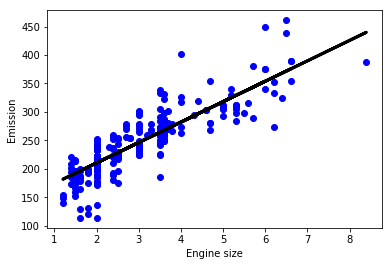

In [10]:
test_x=np.asanyarray(test[['eSize']])
test_y=np.asanyarray(test[['CO2Emission']])
test_y_=regr.predict(test_x)


print("Residual sum of squares: %.2f" % np.mean((test_y_ - test_y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))
# Plot outputs
plt.scatter(test_x, test_y,  color='blue')
plt.plot(test_x, test_y_, color='black', linewidth=3)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Non_linear regression model
It seems that linear model does not perform well as smaller engine size. Let try non-linear model with polynomial feature of degree 2

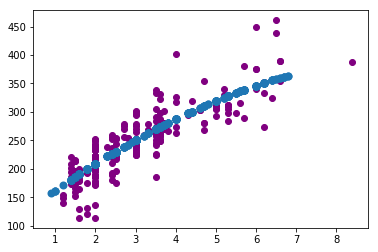

In [12]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
model = make_pipeline(PolynomialFeatures(2), Ridge())
model.fit(train_x, train_y)
train_y_ = model.predict(train_x)
plt.scatter(test_x, test_y,  color='purple')
plt.scatter(train_x, train_y_, linewidth=2)

### Alternative, we add more features to make complex model. 
Here we consider cylinder size, fuel consumption 

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x=np.asanyarray(train[['eSize','Cylinders','FcombineKM']])
y=np.asanyarray(train[['CO2Emission']])
regr.fit (x, y)
# The coefficients
print('Coefficients: ', regr.coef_)

Coefficients:  [[  5.69296271   5.31808511  14.45730845]]


In [20]:
y_=regr.predict(test[['eSize','Cylinders','FcombineKM']])

x=np.asanyarray(test[['eSize','Cylinders','FcombineKM']])
y=np.asanyarray(test[['CO2Emission']])
print("Residual sum of squares: %.2f"
      % np.mean((y_ - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 328.25
Variance score: 0.89


# Classification task
Can we build a classify model with this dataset?
